In [16]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.preprocessing import QuantileTransformer

In [17]:
data = pd.read_csv(r"hk_eui_sample_github.csv",index_col=0,encoding='ISO-8859-1')

In [18]:
y = data['kWh_m2_ann'].reset_index(drop=True)

In [19]:
log_y = np.log10(y)

In [20]:
log_y_category = pd.cut(log_y, bins=5)

In [21]:
log_y_weight = compute_sample_weight('balanced',log_y_category)

In [22]:
X = data[['log_hotel_kern','log_parking_ke','log_food_kerne','log_office_ker','log_retail_ker','DNI_HK','HKG_wind_s','tsd_mask','log_area',
         'No_of_Stor','Year_Built','retro_before','retro_after','log_mtr_dist','is_commercial']].reset_index(drop=True)

In [14]:
seed = 8000

In [15]:
ols = LinearRegression()

In [16]:
cv = KFold(n_splits=5, random_state=seed, shuffle=True)

for (train, test), i in zip(cv.split(X, log_y), range(10)):
    ols.fit(X.iloc[train], log_y.iloc[train],sample_weight=log_y_weight[train])
    log_y_pred = ols.predict(X.iloc[test])
    log_y_true = log_y.loc[test].values

    accuracy_num = 0 
    
    for i in range(len(log_y_pred)):
        if log_y_true[i] > log_eui_median:
            if log_y_pred[i] > log_eui_median:
                accuracy_num = accuracy_num + 1
        if log_y_true[i] <= log_eui_median:
            if log_y_pred[i] <= log_eui_median:
                accuracy_num = accuracy_num + 1
                
    rmse_test = metrics.mean_squared_error(log_y.iloc[test], log_y_pred, squared=False)
    r2_test = metrics.r2_score(log_y.loc[test],log_y_pred)
    accuarcy_test = "{:.2%}".format(accuracy_num/len(log_y_pred))
    print ('RMSE: %.4f'%rmse_test)
    print ('R2: %.4f'%r2_test)
    print ('Accuracy: ', accuarcy_test)

RMSE: 0.3395
R2: 0.1725
Accuracy:  70.95%
RMSE: 0.3339
R2: 0.1762
Accuracy:  70.95%
RMSE: 0.3191
R2: 0.2633
Accuracy:  74.76%
RMSE: 0.3085
R2: 0.2994
Accuracy:  70.95%
RMSE: 0.3060
R2: 0.2460
Accuracy:  72.25%


In [17]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["savefig.dpi"] = 300

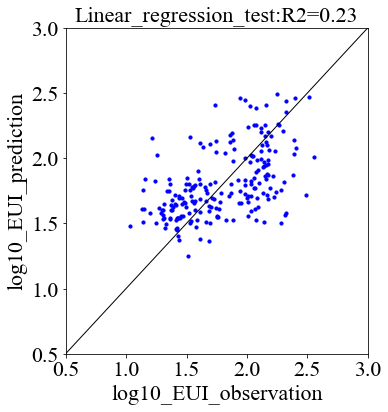

In [18]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
ax.scatter(log_y.iloc[test], log_y_pred, color='b', s=10)    
ax.plot([-10,10],[-10,10], color='k', linewidth=1)
ax.set_xlim([0.5,3])
ax.set_ylim([0.5,3])
ax.tick_params(axis='both', which='major', labelsize=22)
ax.set_title("Linear_regression_test:R2=0.23", fontsize=22)
ax.set_xlabel("log10_EUI_observation", fontsize=22)
ax.set_ylabel("log10_EUI_prediction", fontsize=22)
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.yaxis.set_major_locator(plt.MaxNLocator(5))

plt.subplots_adjust(left=0.2,right=0.9)
plt.show()
plt.close()

In [126]:
ols.coef_

array([ 0.0143474 , -0.02401127,  0.05311908, -0.00570783,  0.06262305,
       -0.26241438, -0.02809994,  0.29778718,  0.29719991,  0.00150542,
        0.00812818,  0.18692298,  0.17419168, -0.13338663, -0.05217396])